# Introduction

The dataset in this analysis includes 19 countries from the Caribbean islands and parts of Latin America. This region has been heavily influenced by European countries since the discovery of America. Countries such as Spain, England and France have had colonies in these countries and some of them are still closed tied to them culturally and economically.
Nowadays, the region has substantial potential and growth opportunities. Most of the countries rely their trade income on commodities whereas tourism is a great source for each country; as they’re one of the most favorable places for tourists. On the other hand, a sustainable usage of ocean resources under the name of “blue economy” gives opportunity for the region's services, logistics, agriculture, creative, and digital industries (World Bank, 2020). Additionally, island countries are extremely susceptible in the case of climate change and natural disasters; extreme weather conditions like hurricanes can wipe out the entire annual GDP of a small island (World Bank, 2020).


This analysis will:

1. Compare the region's most distinctive traits in comparison to the rest of the world.
2. Select a country which best reflects the region's features on average.


In [2]:
jupyter nbconvert --to webpdf --allow-chromium-download Untitled.ipynb

SyntaxError: invalid syntax (<ipython-input-2-897824635e79>, line 1)

In [1]:
# Importing Packages and the Dataset
import pandas             as    pd
import matplotlib.pyplot  as    plt
import seaborn            as    sns
import numpy              as    np


# storing path to the dataset    # adding lines for it to work in google colab

file = './Final_Project_Dataset.xlsx'

dataset = pd.read_excel(   io     = file,
                           sheet_name  = 'Data',
                           header = 0        )

caribbean_ds = dataset[dataset['Cool Name'] == 'Ratchet']
world = dataset[dataset['Cool Name'] != 'Ratchet']


In [2]:
# adding missing values from external research

caribbean_ds.loc[156 ,'CO2 emissions (metric tons per capita)']=0.63
caribbean_ds.loc[207 ,'CO2 emissions (metric tons per capita)']=0.07
caribbean_ds.loc[51 ,'Improved water source (% of population with access)']= 96
caribbean_ds.loc[156 ,'Improved water source (% of population with access)']= 99
caribbean_ds.loc[206 ,'Improved water source (% of population with access)']= 98
caribbean_ds.loc[206 ,'Internet users (per 100 people)']=35.7
caribbean_ds.loc[207 ,'Mobile cellular subscriptions (per 100 people)']=87.13590586


C:\Users\antof\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [3]:
#dropping index columns
caribbean_ds.drop([ 'Country Code Total',\
                   'Country Name',\
                   'Hult Region',\
                   'Cool Name'],
                   axis    = 1,
                   inplace = True)

world.drop([ 'Country Code Total',\
                   'Country Name',\
                   'Hult Region',\
                   'Cool Name'],
                   axis    = 1,
                   inplace = True)

#checking result
#print (caribbean_ds.columns)

C:\Users\antof\anaconda3\lib\site-packages\pandas\core\frame.py:4160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


# Dataset Management




## Strategy for Missing Values

We have the following steps for processing missing values:
1. Columns with less than 65% missing values: Impute median and mean
2. Columns with more than 65% missing values: Drop the columns


In [4]:
#deleting all columns with more than 65% missing values plus string columns 
#as they prevent me to iterate on the dataframe


for key, value in caribbean_ds.iteritems():
    if caribbean_ds[key].isnull().astype(int).mean() > 0.65:
        caribbean_ds.drop(  key,                    
                            axis    = 1,
                            inplace = True)
        world.drop(  key,                    
                            axis    = 1,
                            inplace = True)  


#65% was chosen as a way to be able to analyze the dataset and only
#dropping columns with an excess of missing values. Since, 
#even with 50% missing values, that itself is an insight of the region.  



In [5]:
#IMPUTATION

#printing values before imputation
caribbean_ds.isnull().astype(int).sum()

#imputing median if positively skewed and mean if negatively skewed
for k,v in caribbean_ds.iteritems():
    if caribbean_ds[k].mean(axis=0) > caribbean_ds[k].median(axis=0):
        caribbean_ds[k].fillna(value   = caribbean_ds[k].median(axis = 0),
                               inplace = True)
        
    elif caribbean_ds[k].mean(axis=0)< caribbean_ds[k].median(axis=0):
        caribbean_ds[k].fillna(value = caribbean_ds[k].mean(axis=0),
                              inplace = True)
    
    elif caribbean_ds[k].mean(axis=0)== caribbean_ds[k].median(axis=0):
        caribbean_ds[k].fillna(value = caribbean_ds[k].mean(axis=0),
                              inplace = True)
    
    else:
        print('errorrrr')


#IMPUTATION

#printing values before imputation
#world.isnull().astype(int).sum()

#imputing median if positively skewed and mean if negatively skewed
for k,v in world.iteritems():
    if world[k].mean(axis=0) > world[k].median(axis=0):
        world[k].fillna(value   = world[k].median(axis = 0),
                               inplace = True)
        
    elif world[k].mean(axis=0)< world[k].median(axis=0):
        world[k].fillna(value = world[k].mean(axis=0),
                              inplace = True)
    
    elif world[k].mean(axis=0)== world[k].median(axis=0):
        world[k].fillna(value = world[k].mean(axis=0),
                              inplace = True)
    
    else:
        print('error')

#print(world.isnull().astype(int).any())
#print(caribbean_ds.isnull().astype(int).any()) 

C:\Users\antof\anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


## Outliers Management

To find outlier values, we have opted for a graphic representation of all columns using boxplots.

<ipython-input-6-2b94289333a2>:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.subplots(j+1,1)


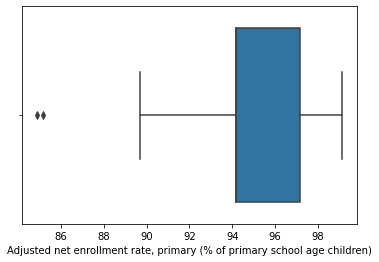

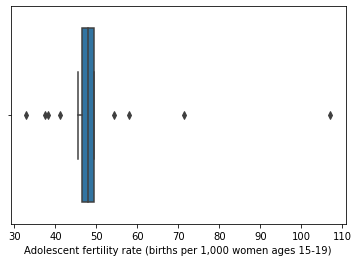

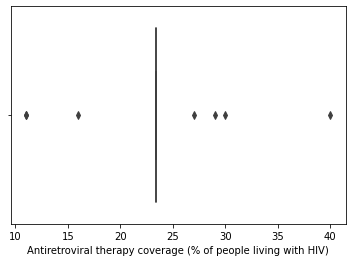

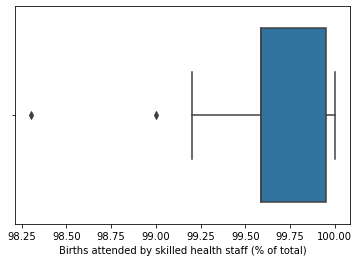

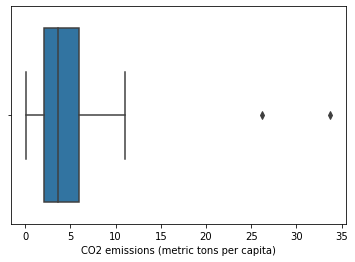

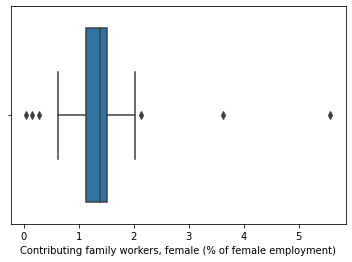

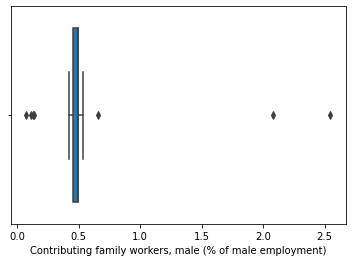

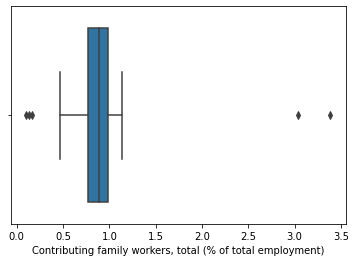

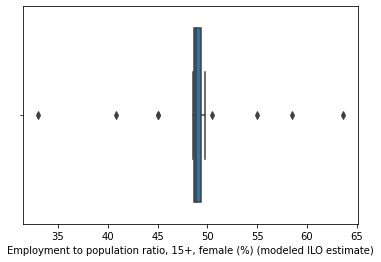

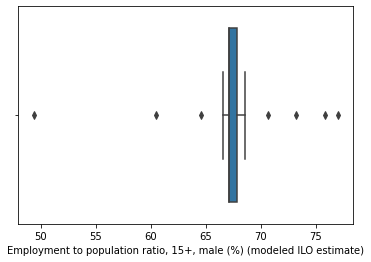

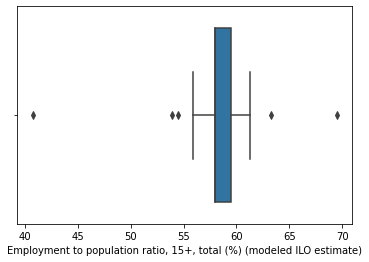

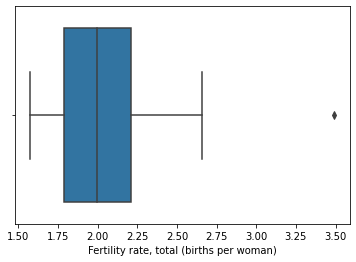

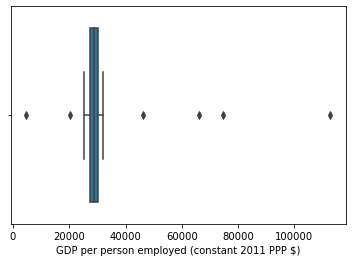

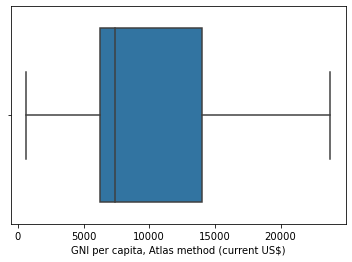

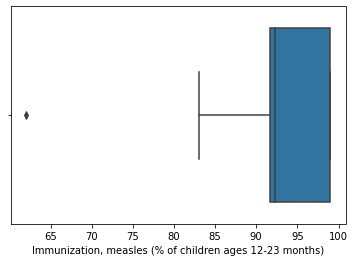

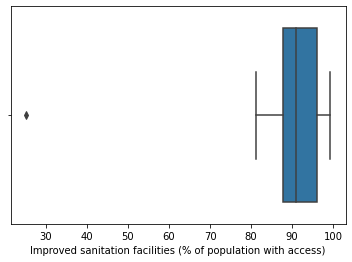

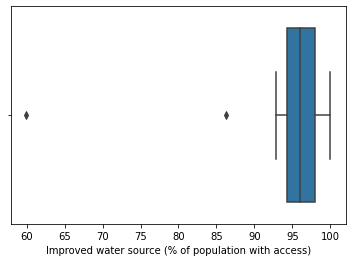

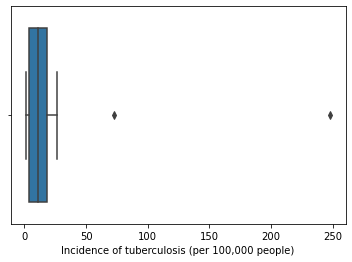

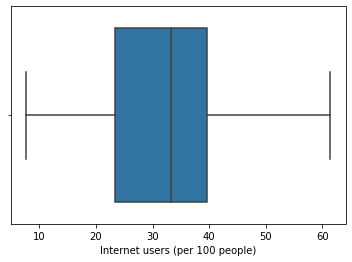

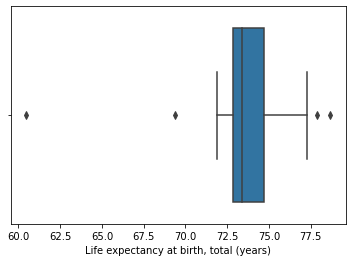

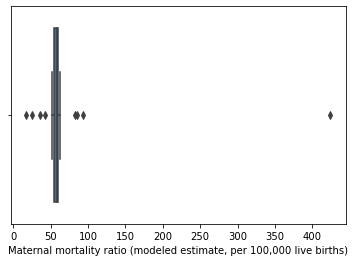

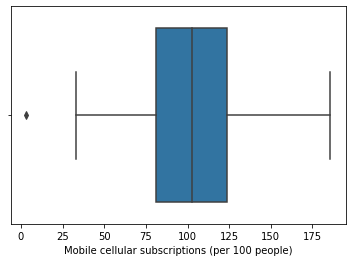

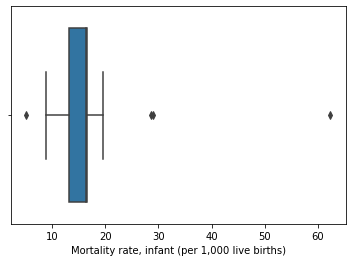

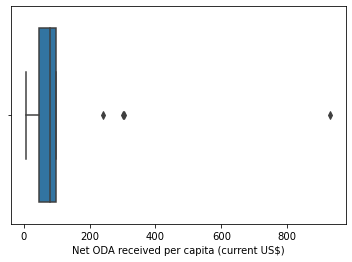

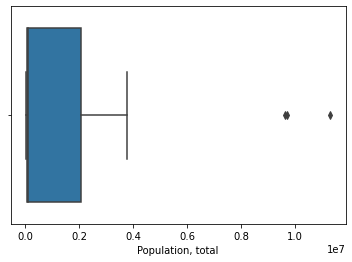

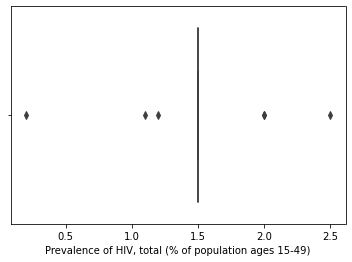

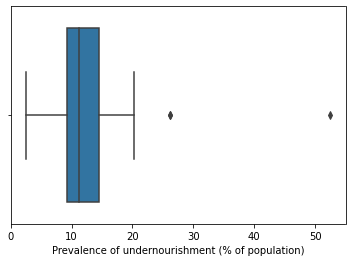

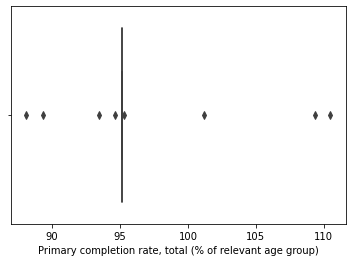

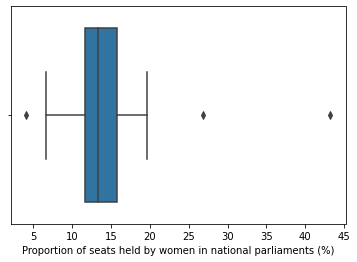

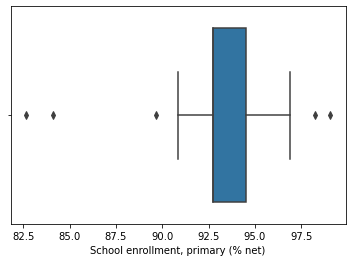

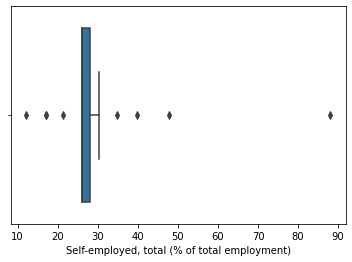

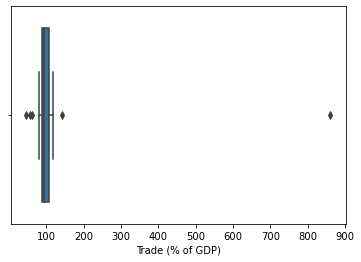

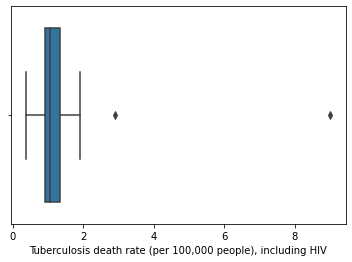

In [6]:
#OUTLIARS DETECTION

#above, imputing the mean have not changed the mean or the median not even for a decimal number
#checking if something changes with a graphic distribution of dataframes before and after our filling
for k,v in caribbean_ds.iteritems():
                j=0
                
                plt.subplots(j+1,1)
                sns.boxplot ( x = caribbean_ds[k],
                                hue = None,
                                orient = 'h',
                                data= caribbean_ds)

                
                j+=1


We first take into consideration the number of observations we have in the dataset: we only have 19 countries and the value of one country accounts for 5.53% of the total (1/19 = 0.053).

By looking at the boxplots, we find that for some attributes, countries' data are widely spread out. For example, by looking at "Adolescent fertility rate (births per 1000 women aged 15-19)", we can see the interquartile range takes all values from around 45%0 to 50%0, leaving eight outliers. Dropping these values from the distribution indicating our analysis would not take into account the fact that eight countries in the Caribbean region have an adolescent fertility rate of 70%0, 109%0, 73%0, 60%0, 55%0, 43%0, 40%0, 38%0,36%0, and 33%0. We consider this kind of information relevant for our analysis.

For these two reasons we have decided to include all the outliers in our analysis.

# Region Analysis


To get to know more about our region, we compute correlation coefficients between each variable and present a heat map as following:

In [7]:
# creating a correlation distribution

caribbean_ds_corr = caribbean_ds.corr(method = 'pearson').round(decimals =2)
print(caribbean_ds_corr.head())

                                                    Adjusted net enrollment rate, primary (% of primary school age children)  \
Adjusted net enrollment rate, primary (% of pri...                                               1.00                          
Adolescent fertility rate (births per 1,000 wom...                                              -0.64                          
Antiretroviral therapy coverage (% of people li...                                               0.49                          
Births attended by skilled health staff (% of t...                                              -0.26                          
CO2 emissions (metric tons per capita)                                                           0.38                          

                                                    Adolescent fertility rate (births per 1,000 women ages 15-19)  \
Adjusted net enrollment rate, primary (% of pri...                                              -0.64             

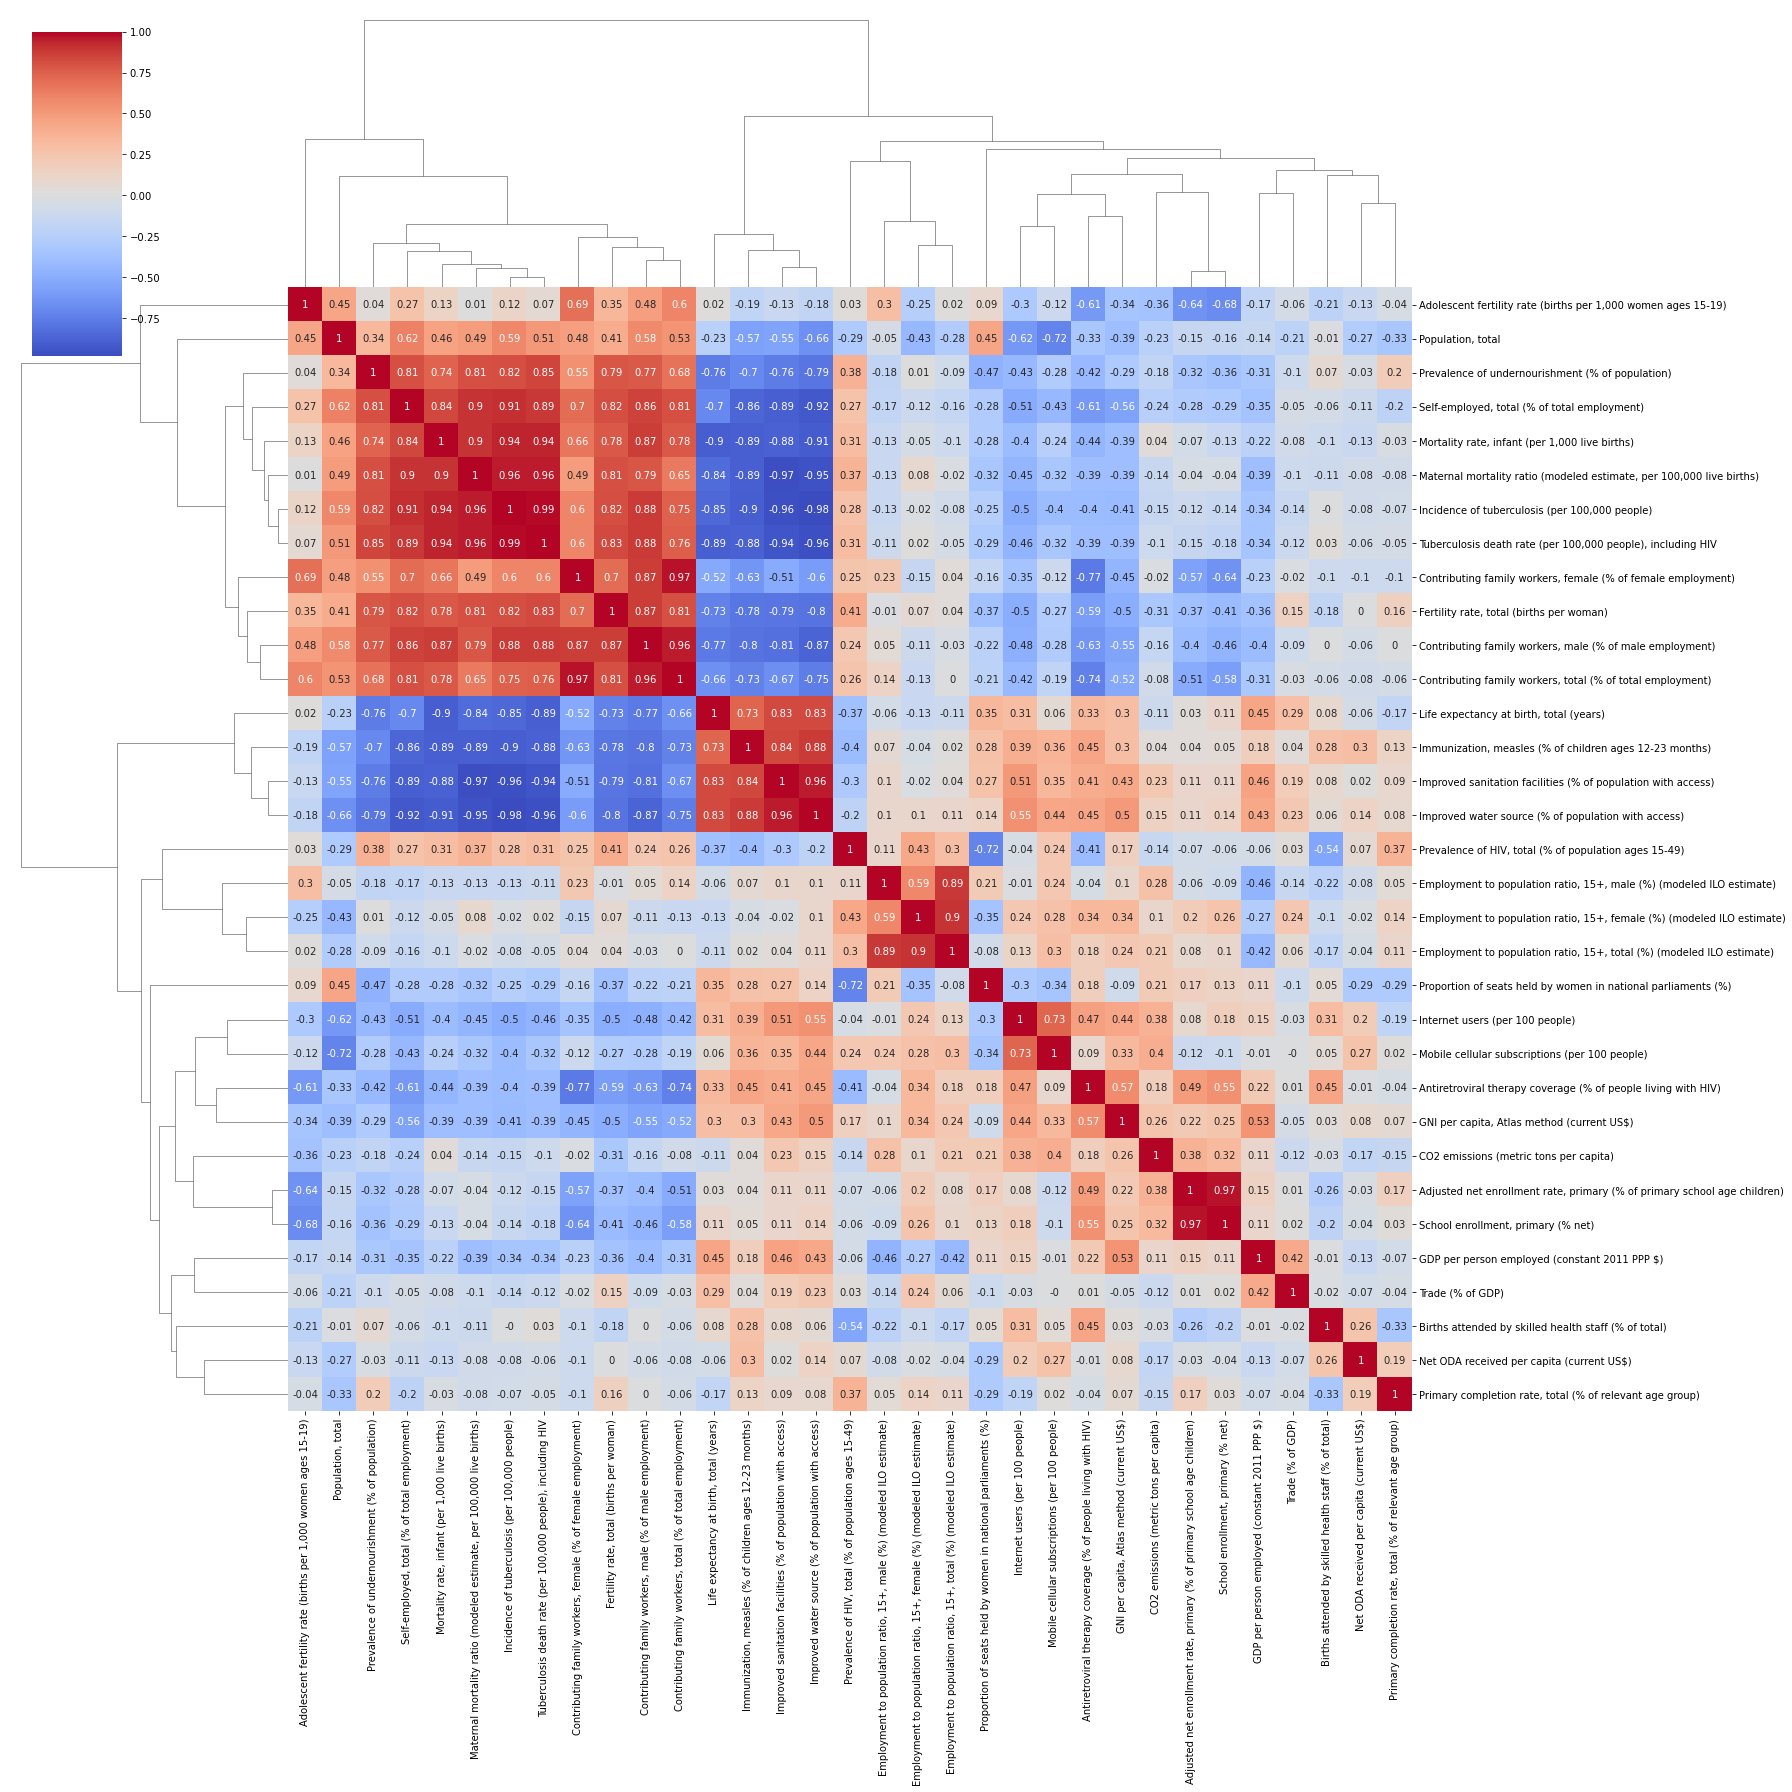

In [8]:
#clustermap to see most correlated columns



sns.clustermap( data = caribbean_ds_corr, #with a clustermap it easier to see which columns are the most correlated
            cmap = 'coolwarm',
            annot =True,
            figsize = (25,25))



The heatmap shows a strong correlation between the variables on the top left corner. The bluer is the corresponding square, the strongest is a negative correlation. The more red is the corresponding square, the strongest is the positive correlation.

Therefore, we decided to drop the variables with the lightest colors to include in our analysis only the ones with correlation coefficients between -0.5 and 0.5.

In [9]:
#dropping columns if all values have -0.5<corr<0.5

caribbean_ds_corr.drop(['Births attended by skilled health staff (% of total)',\
                       'CO2 emissions (metric tons per capita)',\
                        'GDP per person employed (constant 2011 PPP $)',\
                        'GNI per capita, Atlas method (current US$)',\
                        'Net ODA received per capita (current US$)',\
                        'Primary completion rate, total (% of relevant age group)',\
                        'Trade (% of GDP)'],
                      inplace=True,
                      axis = 1)


In [10]:
#taking the most correlated columns to make a more centered clustermap 

carib_most_corr= caribbean_ds_corr[['Prevalence of undernourishment (% of population)', \
                                   'Self-employed, total (% of total employment)',\
                                   'Mortality rate, infant (per 1,000 live births)',\
                                   'Maternal mortality ratio (modeled estimate, per 100,000 live births)',\
                                   'Incidence of tuberculosis (per 100,000 people)',\
                                   'Contributing family workers, female (% of female employment)',\
                                   'Fertility rate, total (births per woman)',\
                                   'Contributing family workers, male (% of male employment)',\
                                   'Contributing family workers, total (% of total employment)',\
                                   'Adolescent fertility rate (births per 1,000 women ages 15-19)',\
                                   'Population, total',\
                                   'Life expectancy at birth, total (years)',\
                                   'Immunization, measles (% of children ages 12-23 months)',\
                                   'Improved sanitation facilities (% of population with access)',
                                   'Improved water source (% of population with access)',\
                                   'Tuberculosis death rate (per 100,000 people), including HIV']]

carib_most_corr= carib_most_corr.drop(['Proportion of seats held by women in national parliaments (%)',\
                                      'Prevalence of HIV, total (% of population ages 15-49)',\
                                      'Employment to population ratio, 15+, female (%) (modeled ILO estimate)',\
                                      'Employment to population ratio, 15+, male (%) (modeled ILO estimate)',\
                                      'Employment to population ratio, 15+, total (%) (modeled ILO estimate)',\
                                      'GDP per person employed (constant 2011 PPP $)',\
                                      'Trade (% of GDP)',\
                                      'Births attended by skilled health staff (% of total)',\
                                      'Primary completion rate, total (% of relevant age group)',\
                                      'Net ODA received per capita (current US$)',\
                                      'Mobile cellular subscriptions (per 100 people)',\
                                      'Internet users (per 100 people)',\
                                      'GNI per capita, Atlas method (current US$)',\
                                      'CO2 emissions (metric tons per capita)',\
                                      'Antiretroviral therapy coverage (% of people living with HIV)',\
                                      'Adjusted net enrollment rate, primary (% of primary school age children)',\
                                      'School enrollment, primary (% net)'
                                       
                                      ])

## A New Heatmap

The next heatmap displays only the most correlated features.

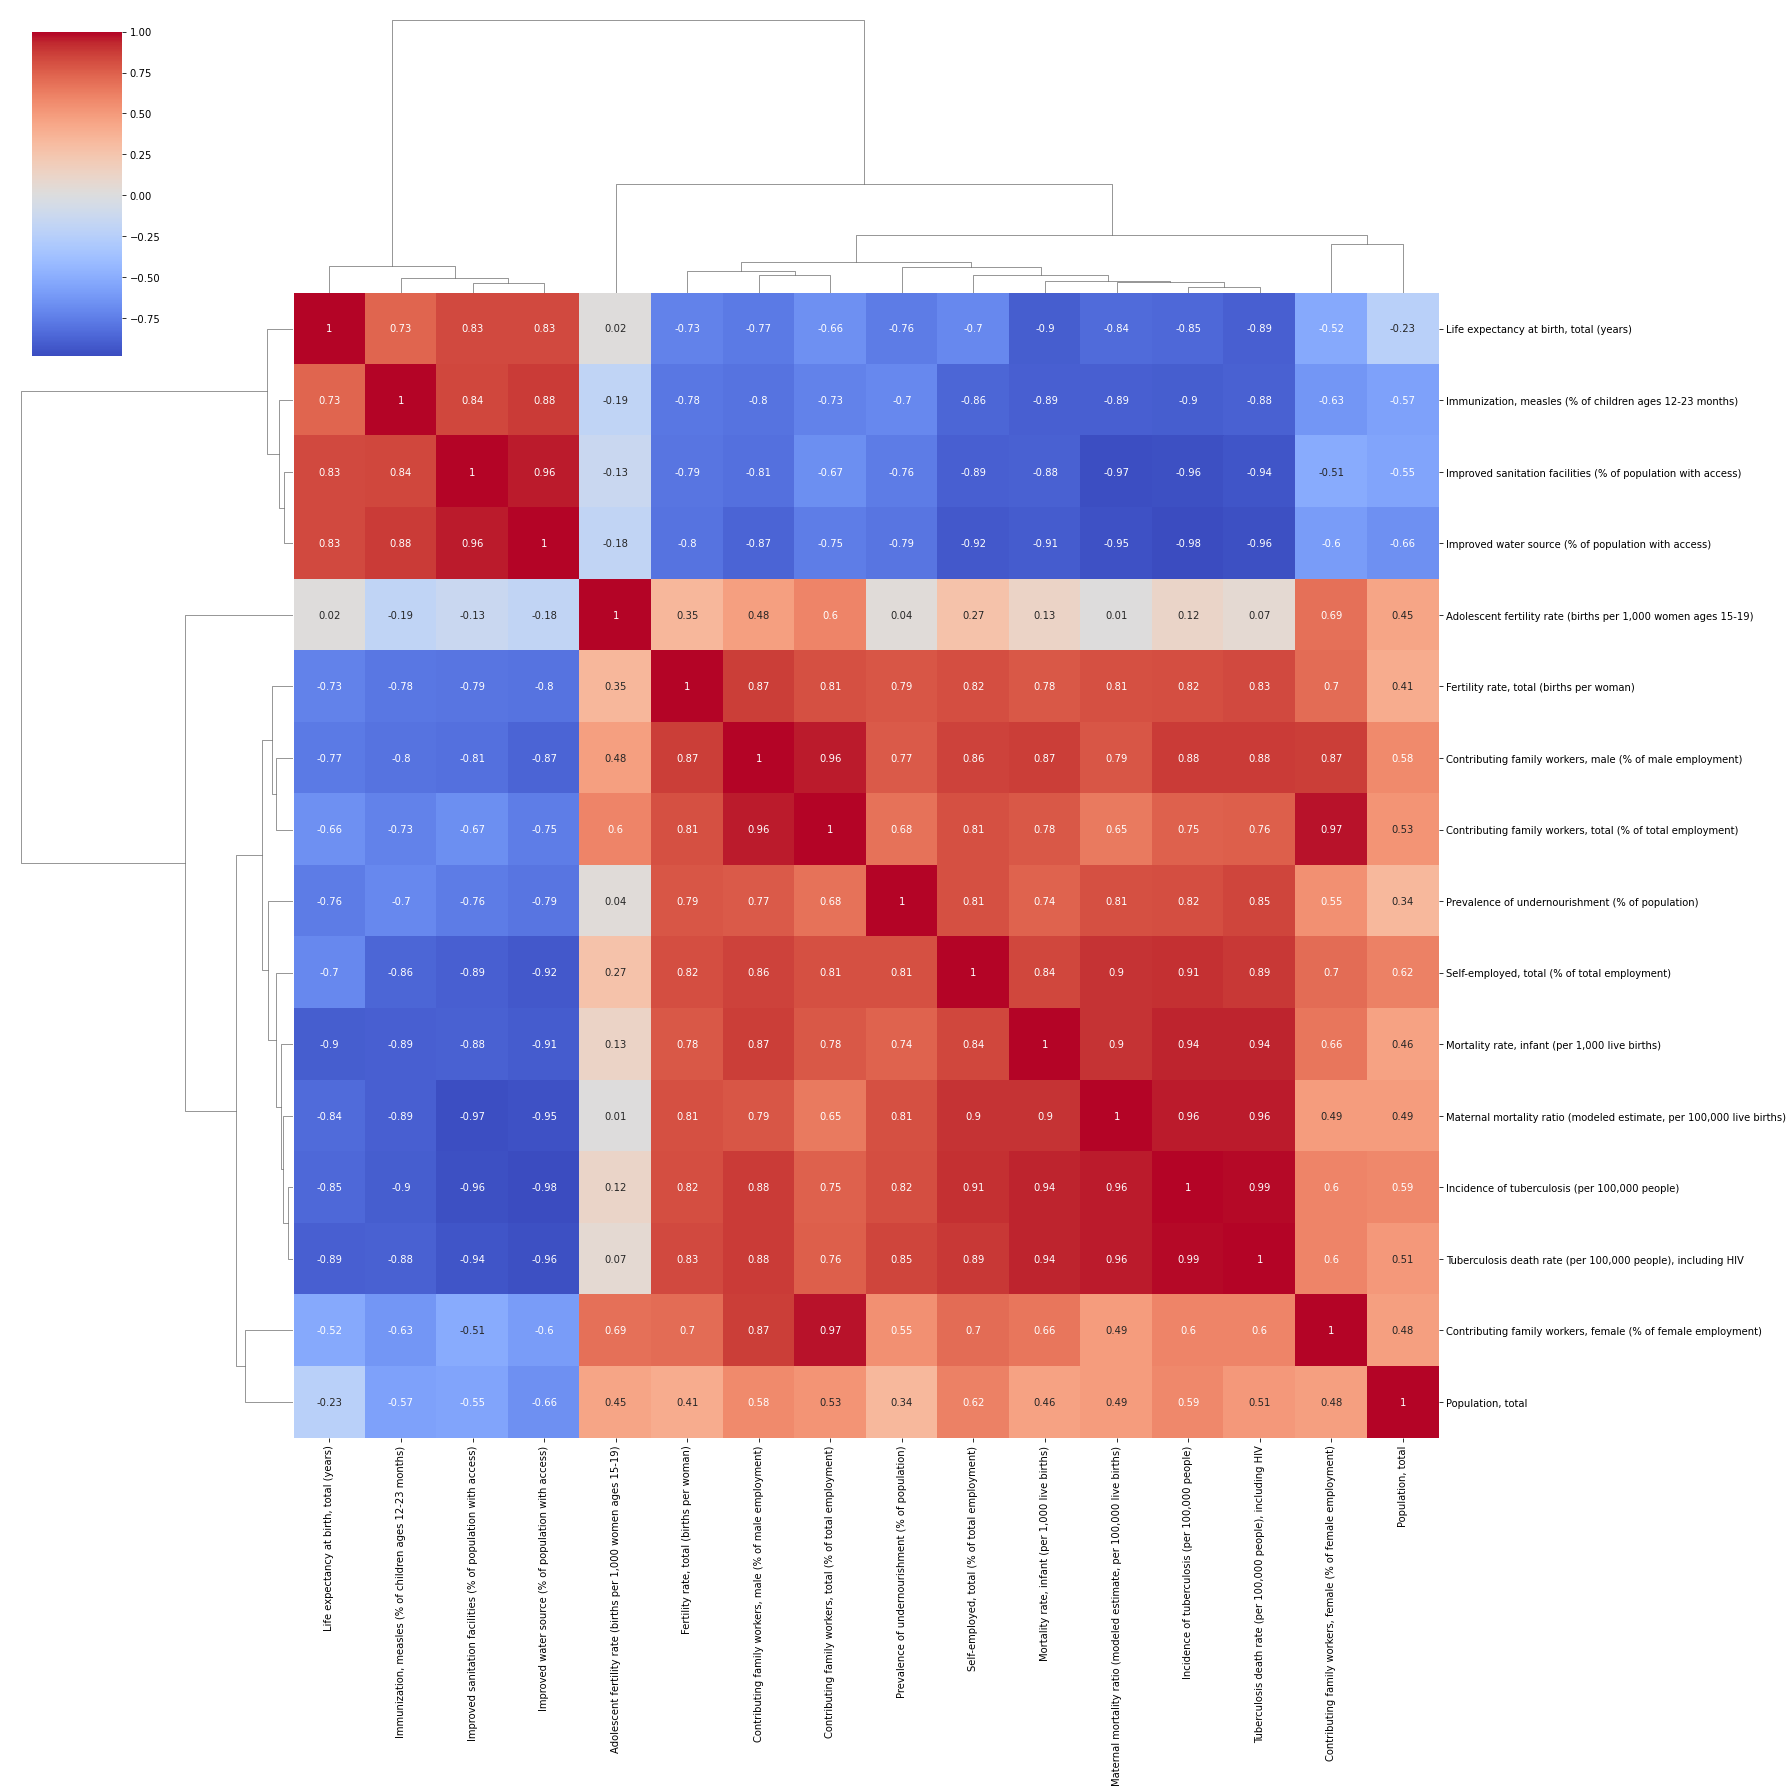

In [11]:
#concised heatmap
sns.clustermap( data = carib_most_corr,
            cmap = 'coolwarm',
            annot =True,
            figsize = (25,25))

## Most Correlated Variables Summary

With the exception of Haiti, tuberculosis is not a problem in the Caribbeans, but it is highly correlated with self-employment. The latter has also a strong negative correlation with measles immunization, sanitation facilities, life expectancy, and improved water sources and a strong positive correlation with prevalence of undernourishment.
We do not have enough information to make a definite statement, however, assuming that self-employed people are part of the mid-lower class, data suggests that focusing on social and economic development can reduce illness and mortality rate, thereby enabling their population to live longer lives.
*From external research we have found that self-employed are not usually part of the higher class

# Choosing the Top 5 Features that Differentiate the Caribbean Region from the Rest of the World

For the selection of the Caribbean top 5 features, we chose to look at distribution of each variable graphically in order to see in-depth differences between the Caribbean and the rest of the world.

The red bars represent the caribbean region while the black color represents the rest of the world. The lines show the distribution of the dataset.

If the black and red areas are visibly different, it means that the Caribbean region differentiates itself from the rest of the world in that specific variable.

C:\Users\antof\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\antof\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\antof\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

C:\Users\antof\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\antof\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\antof\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

C:\Users\antof\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\antof\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\antof\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

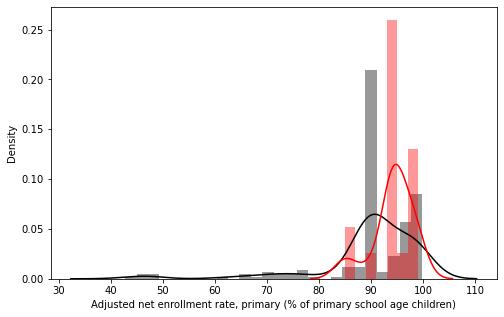

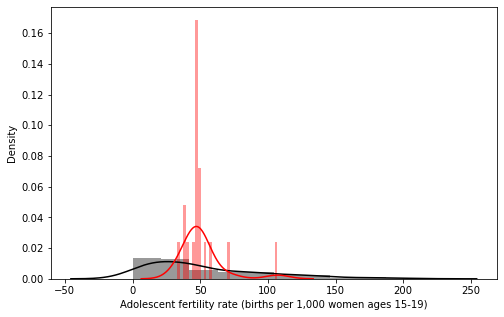

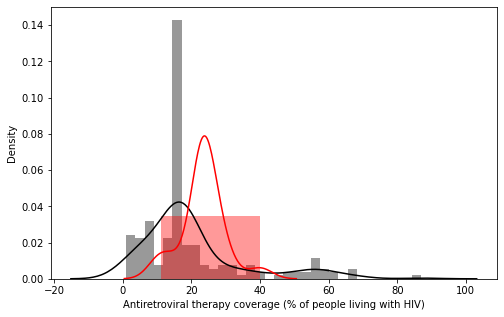

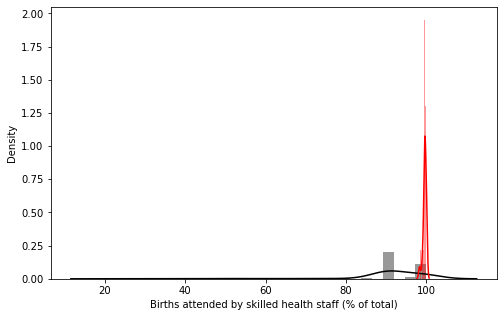

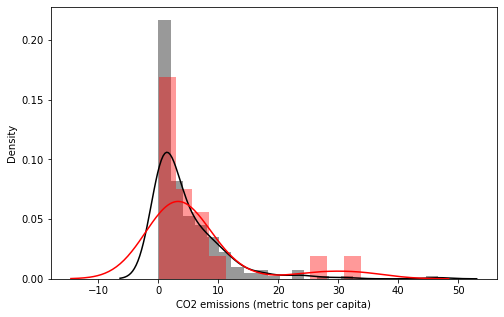

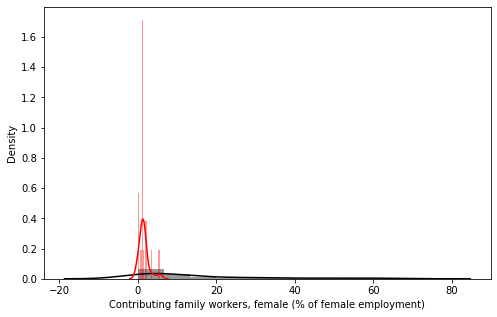

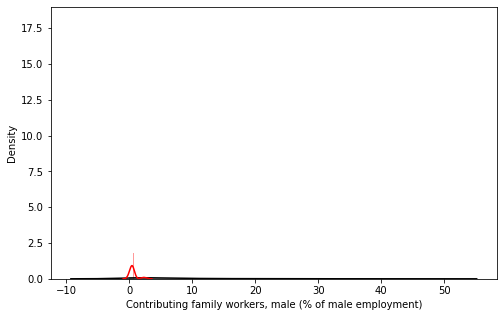

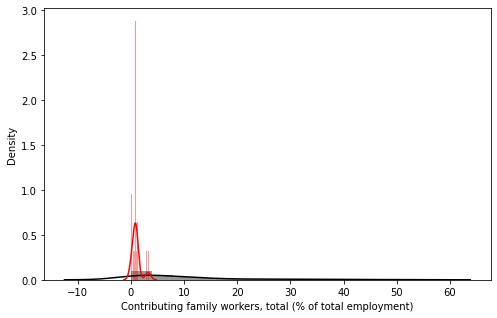

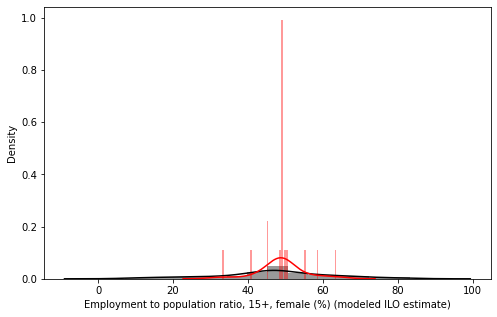

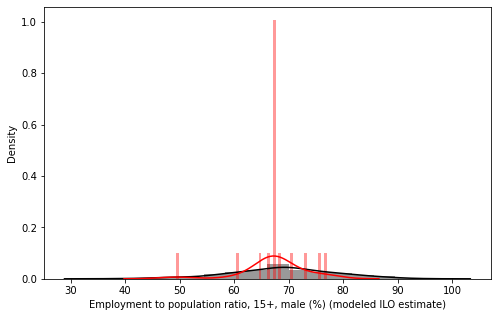

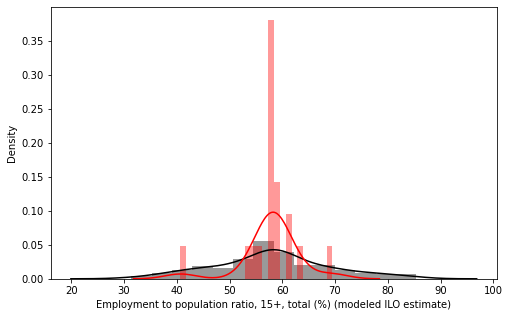

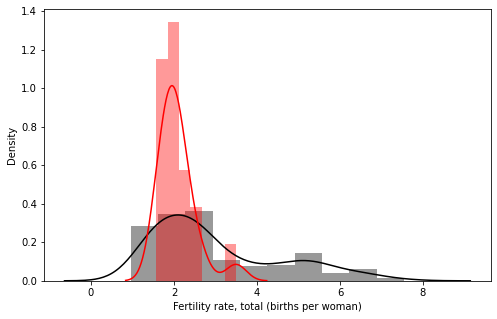

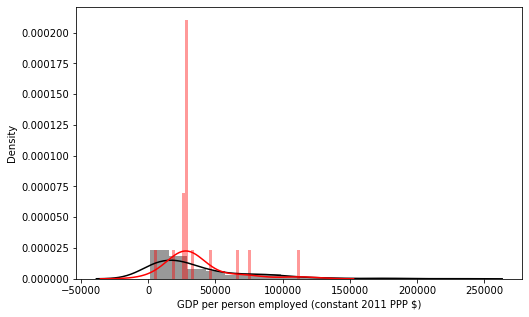

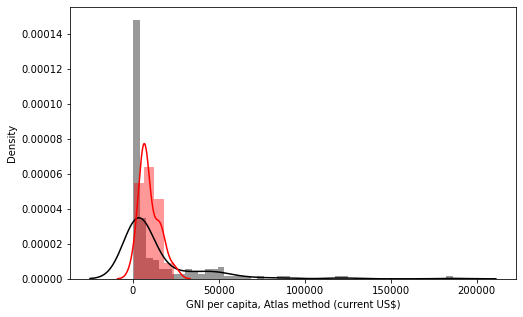

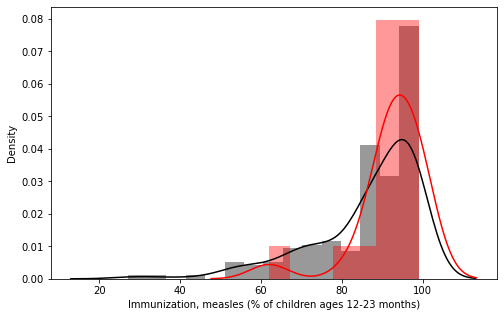

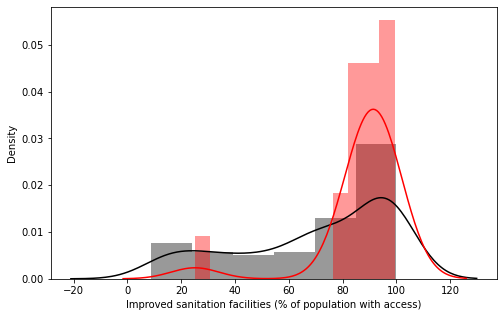

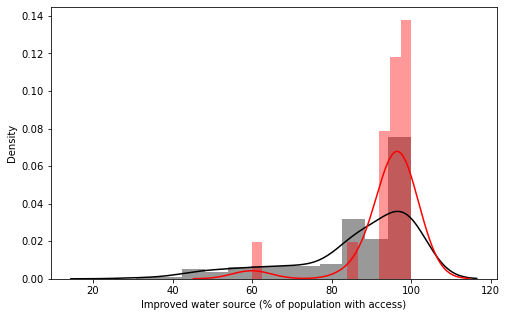

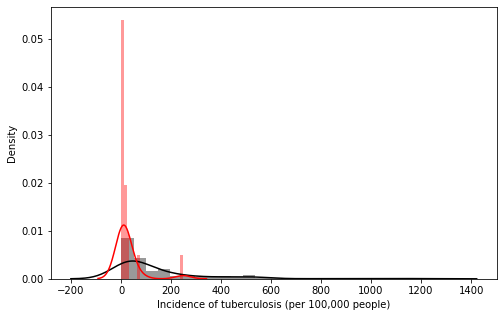

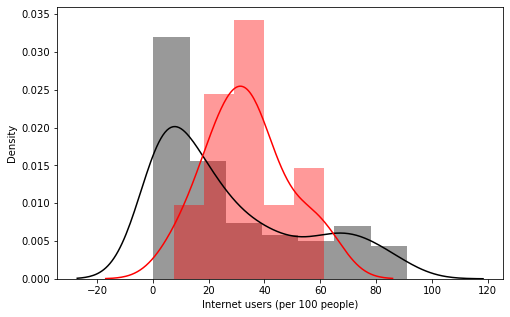

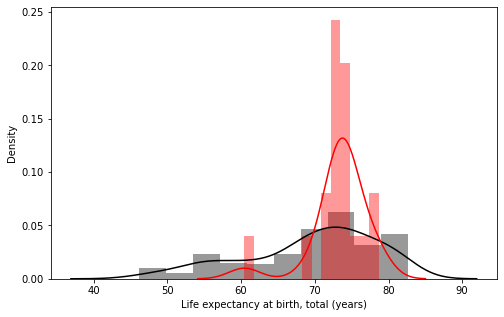

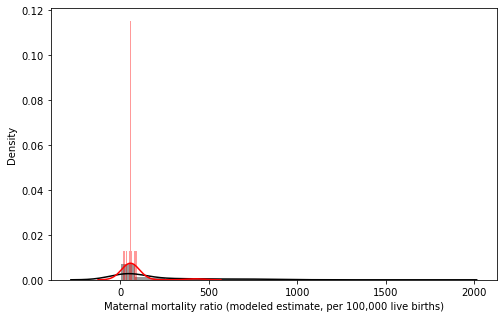

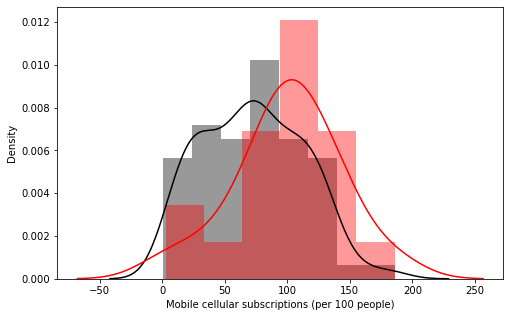

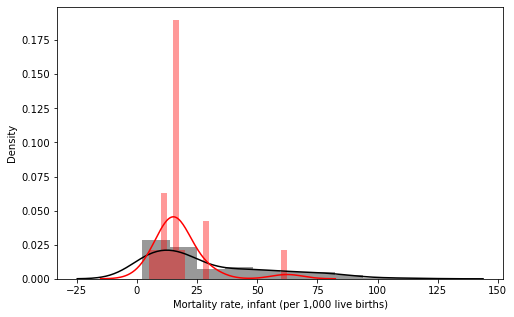

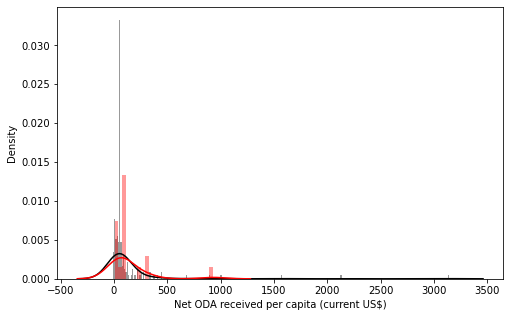

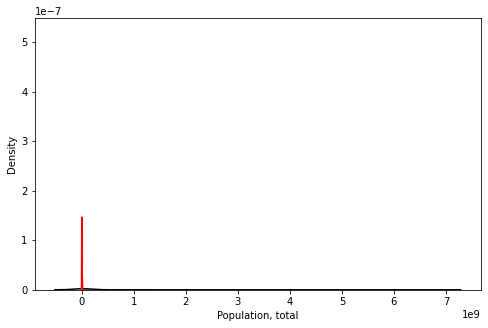

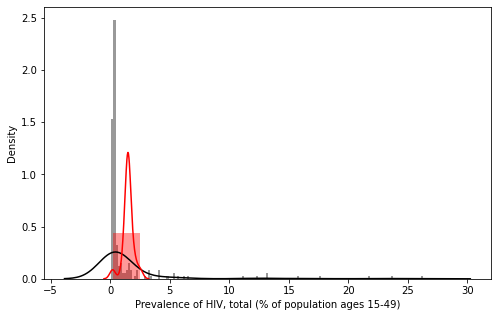

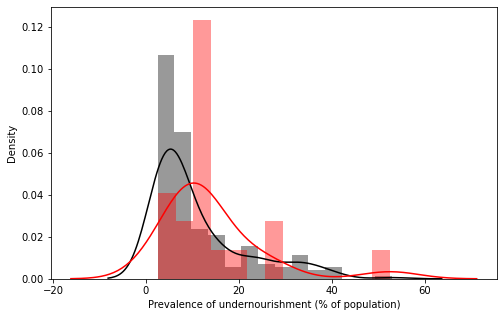

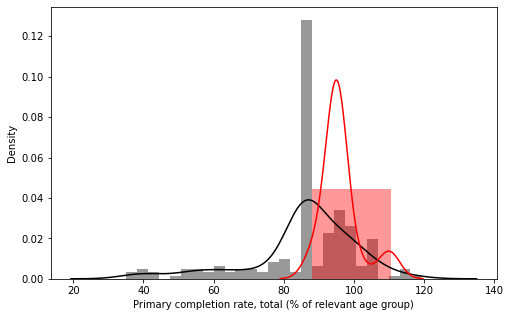

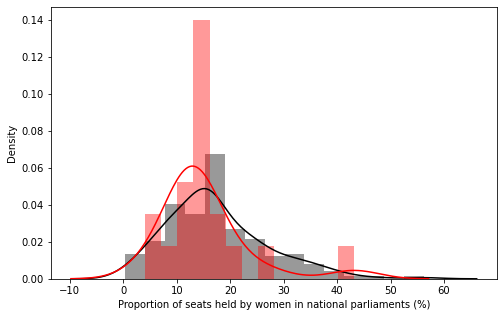

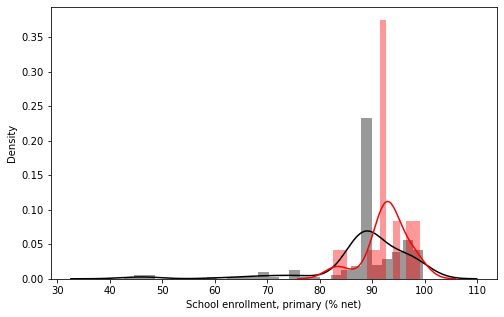

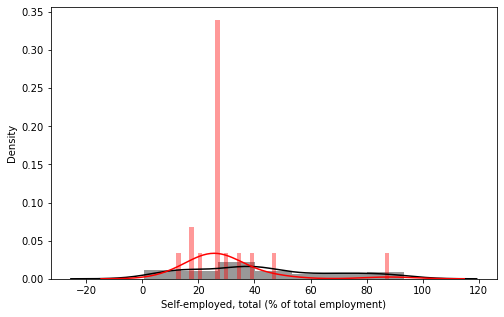

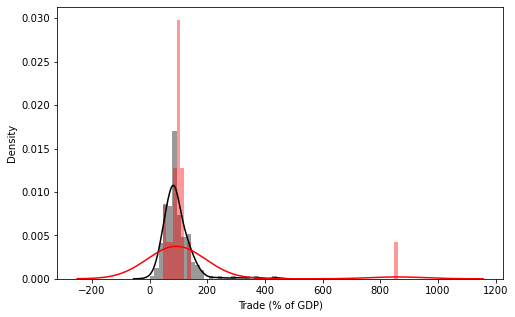

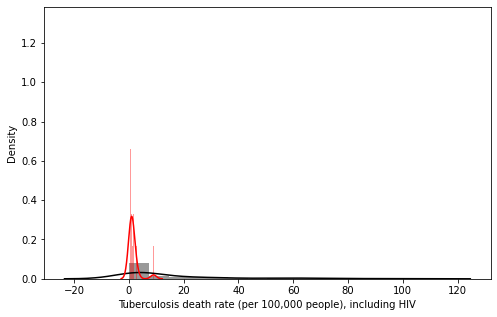

In [12]:
#displaying charts
for k,v in caribbean_ds.iteritems():

        
        fig, ax = plt.subplots(figsize = [8,5],
                                sharex = True,
                                sharey = True)
        
        sns.distplot(  a       = world[k],
                        bins   = 'fd',
                        hist   = True,
                        kde    = True,
                        rug    = False,
                        color = 'black')
        
        #plt.axvline(world[k].mean(),color='black')
        #plt.axvline(world[k].median(),color='grey')
        
        sns.distplot(  a       = caribbean_ds[k],
                        bins   = 'fd',
                        hist   = True,
                        kde    = True,
                        rug    = False,
                        color = 'red')
        
        #plt.axvline(caribbean_ds[k].mean(),color='red')
        #plt.axvline(caribbean_ds[k].median(),color='orange')

The top five variables that most distinguish the Caribbean from the rest of the world are:

<b>Adolescent Fertility Rate</b>

The region is the most restrictive in the world when it comes to abortion and contraception. Cultural aspects also play an important role as childbearing and early motherhood tend to be a norm in this region.

<b>Employment to Population Ratio</b>

The region is highly dependent on the Tourism and Hospitality industry which is known to be a female dominated industry, yet there are more men in the workforce than women. Income inequality and high fertility rate may be the top reasons.

<b>Tuberculosis Rates</b>

The Latin America and Caribbean countries are currently at the forefront of eliminating Tuberculosis. Since the extremely high number of cases in the aftermath of WWII, multiple campaigns and measures using internal resources as well as external funding to reduce the number of cases. The region has plans and potential to be the first to eradicate the public health problem.

<b>Life Expectancy at Birth</b>

Life Expectancy at birth is high in the LAC region. It will lead to a higher percentage of elderly population and a decreasing population in young people. Aging population can threaten the sustainability of the region and the labour market may see people working beyond their retirement age.

<b>Self Employment Rate</b>

We assumes that most of the self employed individuals work by a small medium enterprise (i.e. bakery, butchery).
The high self- employment rate may help shed some light on the tax system of the Caribbean and Latin America region.

-- The larger or multinational companies in the region do not offer quality jobs. The people face job insecurity and thus consider self-employment as a safer bet.

-- Smaller firms are often exempted from paying taxes, making the situation more favourable for SMEs.

-- Tax evasion for smaller businesses and high tax for larger businesses leaves little motivation for organisations to grow. This could potentially hamper growth for the entire region.


In [13]:
#creating a copy of the dataset for the next analysis
features=caribbean_ds.copy()

In [14]:
#creating a dataframe with the top 5 features of the region in comparison to the world


features.drop(['Adjusted net enrollment rate, primary (% of primary school age children)',\
              'Antiretroviral therapy coverage (% of people living with HIV)',\
              'Births attended by skilled health staff (% of total)',\
       'CO2 emissions (metric tons per capita)',\
       'Contributing family workers, female (% of female employment)',\
       'Contributing family workers, male (% of male employment)',\
       'Contributing family workers, total (% of total employment)',\
       'Employment to population ratio, 15+, female (%) (modeled ILO estimate)',\
       'Employment to population ratio, 15+, male (%) (modeled ILO estimate)',\
              'Fertility rate, total (births per woman)',\
       'GDP per person employed (constant 2011 PPP $)',\
       'GNI per capita, Atlas method (current US$)',\
       'Immunization, measles (% of children ages 12-23 months)',\
       'Improved sanitation facilities (% of population with access)',\
       'Improved water source (% of population with access)',\
              'Internet users (per 100 people)',\
              'Maternal mortality ratio (modeled estimate, per 100,000 live births)',\
       'Mobile cellular subscriptions (per 100 people)',\
       'Mortality rate, infant (per 1,000 live births)',\
       'Net ODA received per capita (current US$)', 'Population, total',\
       'Prevalence of HIV, total (% of population ages 15-49)',\
       'Prevalence of undernourishment (% of population)',\
       'Primary completion rate, total (% of relevant age group)',\
       'Proportion of seats held by women in national parliaments (%)',\
       'School enrollment, primary (% net)','Trade (% of GDP)',\
       'Tuberculosis death rate (per 100,000 people), including HIV'], axis =1, inplace=True)

#features.head()

# Choosing the Caribbean Country that Best Represent the whole Region

For our selection of country representatives, we first computed the absolute difference of the mean and each value for every country to see which countries have the closest values to the mean.
We sorted each country by this difference and assigned scores respectively. The score is 2 for the closest country to the mean, and increases by 2 for every position further from the mean: the second closest gets 4 points, and so on. To get to the total score, we have summed the scores of each country in each column.
Then we have also considered the percentage of missing values in the 5 columns chosen previously by each country. If the country had a high percentage we excluded it. The percentage is computed excluding the values we have imputed.
After all of the above evaluation we chose the country with the lowest score as the representative of the region, as it has the most values closest to the mean in comparison to the others.

In [15]:
#computing the absolute differences between wach value and the mean of the respective column
for k,v in features.iteritems():
  print(round(features[k]-features[k].mean(),ndigits=2).abs().sort_values())

207     1.47
156     1.65
44      2.75
186     2.98
46      2.98
51      2.98
206     2.98
103     2.98
27      3.21
9       3.36
110     3.53
84      5.48
204     7.16
76      9.89
20     12.80
194    13.45
0      18.09
95     20.49
53     56.20
Name: Adolescent fertility rate (births per 1,000 women ages 15-19), dtype: float64
0       0.00
9       0.00
186     0.00
103     0.00
46      0.00
51      0.00
76      0.00
206     0.00
110     0.61
95      1.43
207     1.58
204     2.03
53      2.93
194     3.35
84      3.43
44      4.03
27      5.28
20     11.55
156    17.24
Name: Employment to population ratio, 15+, total (%) (modeled ILO estimate), dtype: float64
186      0.04
194      1.96
51       4.96
20       9.96
110     11.96
204     12.96
0       14.96
103     14.96
44      17.66
207     18.26
76      20.46
95      21.26
156     23.06
206     23.36
46      23.76
27      24.76
9       24.76
53      47.04
84     222.04
Name: Incidence of tuberculosis (per 100,000 people), dtype: flo

<br><br>
<div style = "width:image width px; font-size:80%; text-align:center;"><img src=./country_pick.png width="550" height="700" style="padding-bottom:0.5em;"> <em>Figure 1: Final Score Table </em></div>

Dominica was the best performing, but only because it has 4 missing values through the 5 variables- explaining the 80% missing values. So we choose not to consider it and eventually we get to St. Lucia.
 
St. Lucia performs better than any other country that does not have missing values. Therefore, we choose it as the country that best represents the region.

## Graphic Representation

In the following graphs, it is possible to see how overall St. Lucia's values are closer to the mean in comparison to other countries.

In [16]:
#creating new object needed for the x axis of the following graphs
names = dataset[dataset['Cool Name'] == 'Ratchet']
for_graphs = dataset[dataset['Cool Name']=='Ratchet']

In [17]:
#creating a new object so we have missing values back

for key, value in for_graphs.iteritems():
    if for_graphs[key].isnull().astype(int).mean() > 0.65:
        for_graphs.drop(  key,                    
                            axis    = 1,
                            inplace = True)

C:\Users\antof\anaconda3\lib\site-packages\pandas\core\frame.py:4160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [18]:
for_graphs.drop([ 'Country Code Total',\
                   'Country Name',\
                   'Hult Region',\
                   'Cool Name',\
                'Adjusted net enrollment rate, primary (% of primary school age children)',\
              'Antiretroviral therapy coverage (% of people living with HIV)',\
              'Births attended by skilled health staff (% of total)',\
       'CO2 emissions (metric tons per capita)',\
       'Contributing family workers, female (% of female employment)',\
       'Contributing family workers, male (% of male employment)',\
       'Contributing family workers, total (% of total employment)',\
       'Employment to population ratio, 15+, female (%) (modeled ILO estimate)',\
       'Employment to population ratio, 15+, male (%) (modeled ILO estimate)',\
              'Fertility rate, total (births per woman)',\
       'GDP per person employed (constant 2011 PPP $)',\
       'GNI per capita, Atlas method (current US$)',\
       'Immunization, measles (% of children ages 12-23 months)',\
       'Improved sanitation facilities (% of population with access)',\
       'Improved water source (% of population with access)',\
              'Internet users (per 100 people)',\
              'Maternal mortality ratio (modeled estimate, per 100,000 live births)',\
       'Mobile cellular subscriptions (per 100 people)',\
       'Mortality rate, infant (per 1,000 live births)',\
       'Net ODA received per capita (current US$)', 'Population, total',\
       'Prevalence of HIV, total (% of population ages 15-49)',\
       'Prevalence of undernourishment (% of population)',\
       'Primary completion rate, total (% of relevant age group)',\
       'Proportion of seats held by women in national parliaments (%)',\
       'School enrollment, primary (% net)','Trade (% of GDP)',\
       'Tuberculosis death rate (per 100,000 people), including HIV'],
                   axis    = 1,
                   inplace = True)

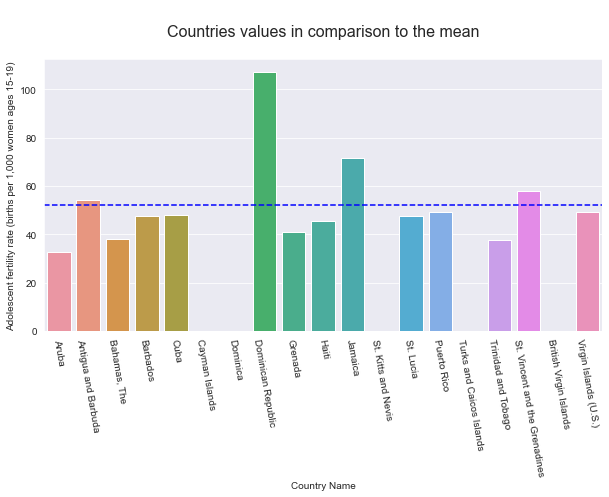

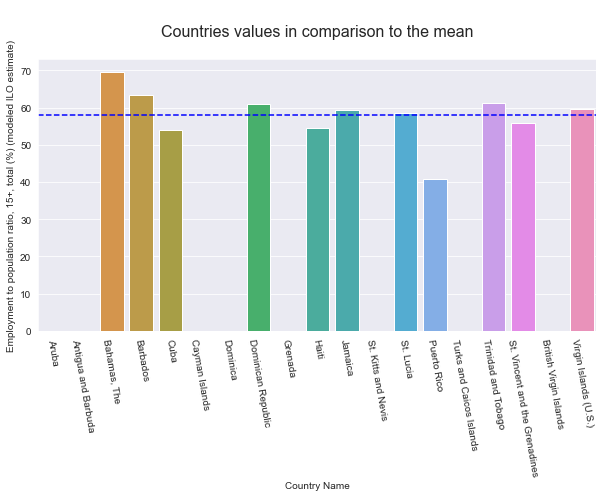

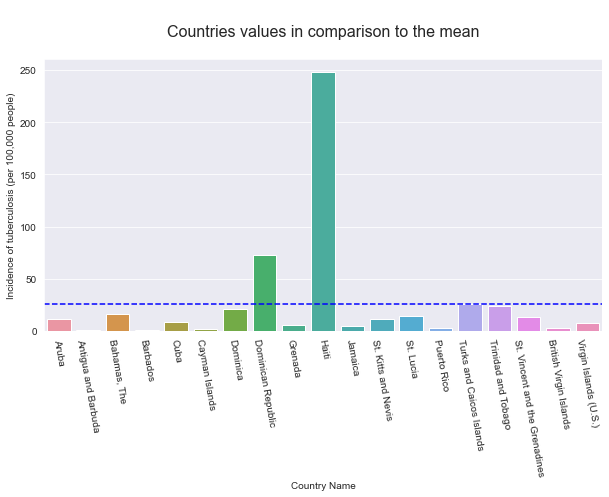

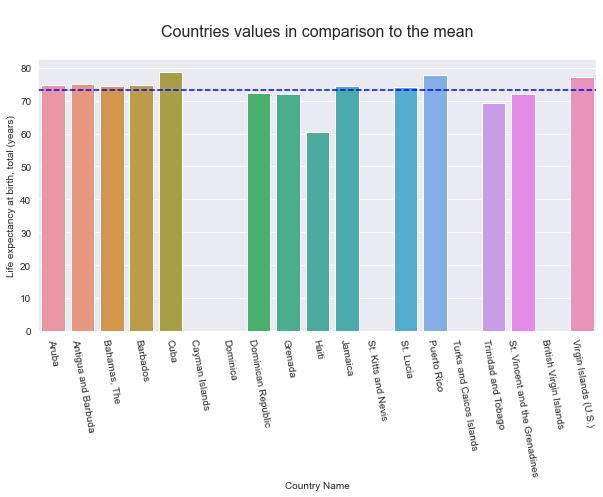

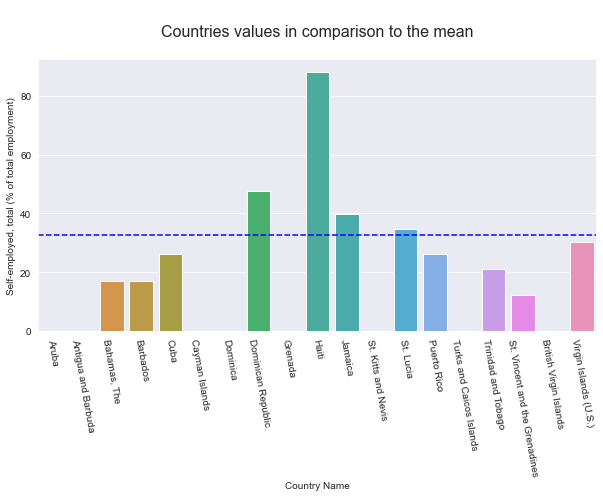

In [19]:
for k,v in for_graphs.iteritems():
    
    sns.set_style("darkgrid")
    
    j=0
    fig, ax = plt.subplots(figsize = [10, 5])


    graph = sns.barplot(x=names['Country Name'],
                y= for_graphs[k], 
                data=for_graphs
                       )
    
    plt.axhline(for_graphs[k].mean(),
                   color = "blue",
                   linestyle = "--")
    
    
    plt.title(label = '\nCountries values in comparison to the mean\n',
              fontsize=16)
    
    for item in graph.get_xticklabels():
        item.set_rotation(-80)
    
    j += 1

## About Saint Lucia

Saint Lucia is a sovereign and independent country located in the Caribbean region, south of Dominica. This island has been both a colony of the French and the English empire at different times during the 18th and 19th century (BBC, 2012). 
 
Tourism is its main source of jobs and income, accounting for 65% of GDP, which is similar to many other countries in the region. Moreover, Saint Lucia’s economy is also vulnerable to diverse external shocks including natural disasters, aligns with the whole region’s characteristics as well (CIA, 2020). 
The ethnicity of this island is both African and of African European descent. Similar to other countries in the region, the main language of St. Lucia is English followed by French creole. St. Lucia enjoys music in the same way as most Caribbean countries do, they perform reggae, jazz, calypso, salsa and other genres in a regular fashion at their traditional musical festivities such as “La Rose” or “La Marguerite”. As well as a popular regional dance called “Kwardril”, which is also danced in Dominica and Guadeloupe (Internet Archive , 1998).

# Further Findings
Most of the data from the dataset are chosen from 2008 from the World Bank, and there are subtle discrepancies between data sourced on the world bank website and in the dataset. The outdated source and inconsistent accuracy casts doubt on whether the dataset can fully represent the regions. However, since the discrepancy is tiny and most data are aligned with external research, the dataset can be trusted for representation for 2008.

# Conclusion
The brief analysis show that countries in the Caribbean region lag behind the rest of the world in the economic (self employment rate, employment to population ratio), infrastructure (tuberculosis rates), and social development areas (adolescent fertility rate, life expectancy at birth). Countries in Caribbean islands and parts of Latin America region need to focus on economic, infrastructure and social development in order to improve guaranteed healthy living conditions.

Caveat: In reality, all these features are intertwined and it is not easy for governments to decide where to start when putting in place effective strategies for growth, and moreover, this is a synthetic analysis made on a small and not-so-much trustworthy dataset. A more detailed analysis - i.e. based on more and better data and using more statistical tools - would be needed for achieving a better quality result.


# Autors

Antonio Froio,
Ecem Direm,
Jenny Xin,
Neha Gowda,
Pablo Quiroz,

# References
Altink, H., 2014. Fight TB With BCG’: Mass Vaccination Campaigns In The British Caribbean. [online] NCBI. Available at: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4176281/ [Accessed 3 November 2020].
 
Business Leader. (2019, May). who are the highest earning self-employed in the UK? https://www.businessleader.co.uk/who-are-the-highest-earning-self-employed-workers-in-the-uk/65106/
 
Cayman Islands. (2017). The data protection law. http://www.dlp.gov.ky/portal/pls/portal/docs/1/12428349.PDF
 
Courses.lumenlearning.com. n.d. Life Expectancy And The Graying Of Society | Social Problems. [online] Available at: https://courses.lumenlearning.com/atd-herkimer-socialproblems/chapter/6-3-life-expectancy-and-the-graying-of-society/ [Accessed 4 November 2020].
 
Iris.paho.org. 2018. Tuberculosis In The Americas, 2018. [online] Available at: https://iris.paho.org/bitstream/handle/10665.2/49510/PAHOCDE18036_eng?sequence=1&isAllowed=y [Accessed 3 November 2020].
 
Neal, S., Harvey, C., Chandra-Mauli, V., Caffe, S. and Chamacho, A., 2018. Trends In Adolescent First Births In Five Countries In Latin America And The Caribbean: Disaggregated Data From Demographic And Health Surveys. [online] NCBI. Available at: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6114051/ [Accessed 4 November 2020].
 
Pagés., C. and Macmillan, P., 2010. Economic Development And Growth In Latin American And Caribbean Countries. [online] Monthly Labour Review. Available at: https://www.bls.gov/opub/mlr/2020/book-review/economic-development-and-growth.htm [Accessed 4 November 2020].
 
Patil, P. G., Virdin, J., Diez, S. M., Roberts, J., & Singh, A. (2016). Toward a blue economy: a promise for sustainable growth in the caribbean (AUS16344). World Bank Group. https://documents1.worldbank.org/curated/en/965641473449861013/pdf/AUS16344-REVISED-v1-BlueEconomy-FullReport-Oct3.pdf
 
Peretti, J. (2016, January 18). The Cayman Islands – home to 100,000 companies and the £8.50 packet of fish fingers. the Guardian. https://www.theguardian.com/us-news/2016/jan/18/the-cayman-islands-home-to-100000-companies-and-the-850-packet-of-fish-fingers
 
Self-employed salary. Zip Recruiter. https://www.ziprecruiter.com/Salaries/Self-Employed-Salary
 
The World Factbook: Dominican Republic. (2018, February 01). Retrieved November 05, 2020, from https://www.cia.gov/library/publications/the-world-factbook/geos/dr.html
 
Un.org. 2017. [online] Available at: https://www.un.org/en/development/desa/population/publications/pdf/policy/reproductive_health_policies_2017_data_booklet.pdf [Accessed 3 November 2020].
 
UNDP. (2019). Human development index (HDI). https://hdr.undp.org/en/content/human-development-index-hdi
 
World Bank. 2013. Self-Employment On The Rise In The Caribbean, But Quality Jobs Remain Elusive. [online] Available at: https://www.worldbank.org/en/news/feature/2013/12/13/entrepreneurs-caribbean-self-employment-quality-jobs-elusive [Accessed 4 November 2020].
 
World Bank. (2020, October 22). The World Bank in the Caribbean. https://www.worldbank.org/en/country/caribbean/overview
